In [6]:
from rdkit import Chem
from gflownet.envs.frag_mol_env import FragMolBuildingEnvContext
ctx = FragMolBuildingEnvContext()

In [ ]:
target_smiles = "[H]C(=O)C1=CC(OC)=C(O)C=C1"
evaluate_smiles = "CCC"

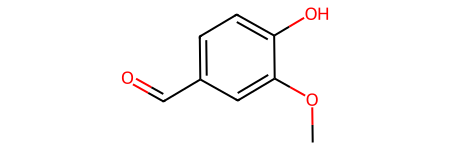

In [57]:
Chem.MolFromSmiles('COc1cc(C=O)ccc1O')

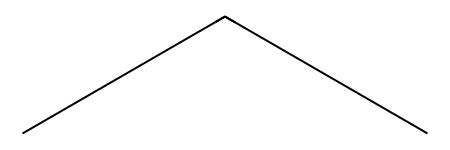

In [4]:
target_mol = Chem.MolFromSmiles(target_smiles)
evaluate_mol = Chem.MolFromSmiles(evaluate_smiles)
evaluate_mol

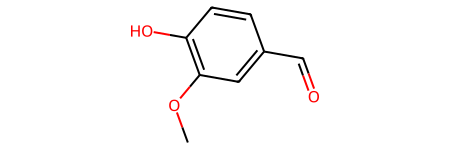

In [58]:
target_mol

In [13]:
type(target_mol)

rdkit.Chem.rdchem.Mol

In [11]:
target_graph = ctx.obj_to_graph(target_mol)
evaluate_graph = ctx.obj_to_graph(evaluate_mol)

In [15]:
targed_id = Chem.RDKFingerprint(target_mol)
evaluate_id = Chem.RDKFingerprint(evaluate_mol)

In [10]:
from rdkit.Chem.AtomPairs.Utils import CosineSimilarity

In [17]:
CosineSimilarity(targed_id,targed_id)

1.0

In [18]:
import pandas as pd 

df=pd.read_csv("data.csv")
df.head()

,nonStereoSMILES,descriptors,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
0,CC(O)CN,fishy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CCC(=O)C(=O)O,fatty;lactonic;sweet;caramellic;creamy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O=C(O)CCc1ccccc1,rose;floral;fatty;sweet;musk;cinnamon;balsamic,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,OCc1ccc(O)cc1,medicinal;phenolic;fruity;nutty;bitter;sweet;a...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,O=Cc1ccc(O)cc1,phenolic;woody;nutty;vanilla;hay;metallic;swee...,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [22]:
vanilla_mols = df.loc[df['vanilla'] == 1]
vanilla_mols.head()

,nonStereoSMILES,descriptors,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
4,O=Cc1ccc(O)cc1,phenolic;woody;nutty;vanilla;hay;metallic;swee...,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
26,COc1ccccc1O,medicinal;savory;phenolic;woody;smoky;vanilla;...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
32,O=C1CCc2ccccc2O1,herbal;nutty;vanilla;coumarinic;hay;tobacco;sw...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
64,COc1cc(C=O)ccc1O,chocolate;vanilla;creamy;sweet,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
67,COc1cc(C(C)=O)ccc1O,vanilla;sweet,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [23]:
len(vanilla_mols)

111

In [24]:
from pom_models.functions import fragance_propabilities_from_smiles

No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (d:\Dokumenter\Skole\Prosjektoppgave\prosjektKopi\pom_cpu-model\venv\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'
Skipped loading some PyTorch models, missing a dependency. No module named 'tensorflow'


In [61]:
evaluate_vec = fragance_propabilities_from_smiles(target_smiles)[0]

d:\Dokumenter\Skole\Prosjektoppgave\prosjektKopi\pom_cpu-model\venv\lib\site-packages\deepchem\models\torch_models\torch_model.py:1078: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental fe

In [62]:
evaluate_vec

array([0.04575705, 0.04282942, 0.05341665, 0.2864027 , 0.03292181,
       0.20288868, 0.36172262, 0.02111002, 0.04237434, 0.317042  ,
       0.4279455 , 0.03573177, 0.03719727, 0.02371974, 0.13851587,
       0.32038513, 0.02894411, 0.01613994, 0.32080555, 0.09608915,
       0.03982432, 0.08091616, 0.27430353, 0.02159856, 0.07350694,
       0.03478025, 0.05178089, 0.25843382, 0.11839368, 0.21073033,
       0.06080894, 0.06195458, 0.34229103, 0.06232229, 0.146159  ,
       0.16066003, 0.01784374, 0.05046922, 0.09188339, 0.07404198,
       0.28687143, 0.3541201 , 0.00835921, 0.10641307, 0.16819969,
       0.1959213 , 0.18295589, 0.06957998, 0.05369797, 0.06176599,
       0.44382554, 0.099797  , 0.04375359, 0.34240264, 0.04317854,
       0.04487146, 0.06809819, 0.1567298 , 0.02871715, 0.03830222,
       0.12342923, 0.30967513, 0.28897983, 0.04847127, 0.24057145,
       0.11724697, 0.05389829, 0.05945813, 0.02251486, 0.02622348,
       0.09840047, 0.01832962, 0.05089313, 0.19233458, 0.02440

In [63]:
target_vec = df.loc[64].to_numpy()[2:]

In [64]:
df.loc[64].to_numpy()[0]

'COc1cc(C=O)ccc1O'

In [65]:
CosineSimilarity(target_vec,evaluate_vec)

0.0

In [55]:
v = Chem.MolToSmiles(target_mol)
for i in range(len(df["nonStereoSMILES"])):
    print(i)
    moldf = Chem.MolFromSmiles(df["nonStereoSMILES"][i])
    molsmiles = Chem.MolToSmiles(moldf)

    if molsmiles==v:
        print(i)
        break    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
64


In [54]:
len(df)

4983